<img src="JFM-notebooks-logo.jpg" style="max-width:100%" />

### Imports

In [3]:
import sys, os
os.environ['NOWARNINGS'] = '1'
sys.path.append('Code')
from load_data import load_data
from postprocessing.plotting import *
plotting_defaults()
plt.rcParams['figure.dpi'] = 150 # to adjust display size in notebook
ref, refsim, transient, varsim_list = load_data('Data', include_ensemble=False)
textwidth = 5.31445

In [4]:
from matplotlib.offsetbox import AnchoredText
import numpy as np
import matplotlib.pyplot as plt
from postprocessing.plotting import *
viridis = plt.get_cmap('viridis')

### Generate figure

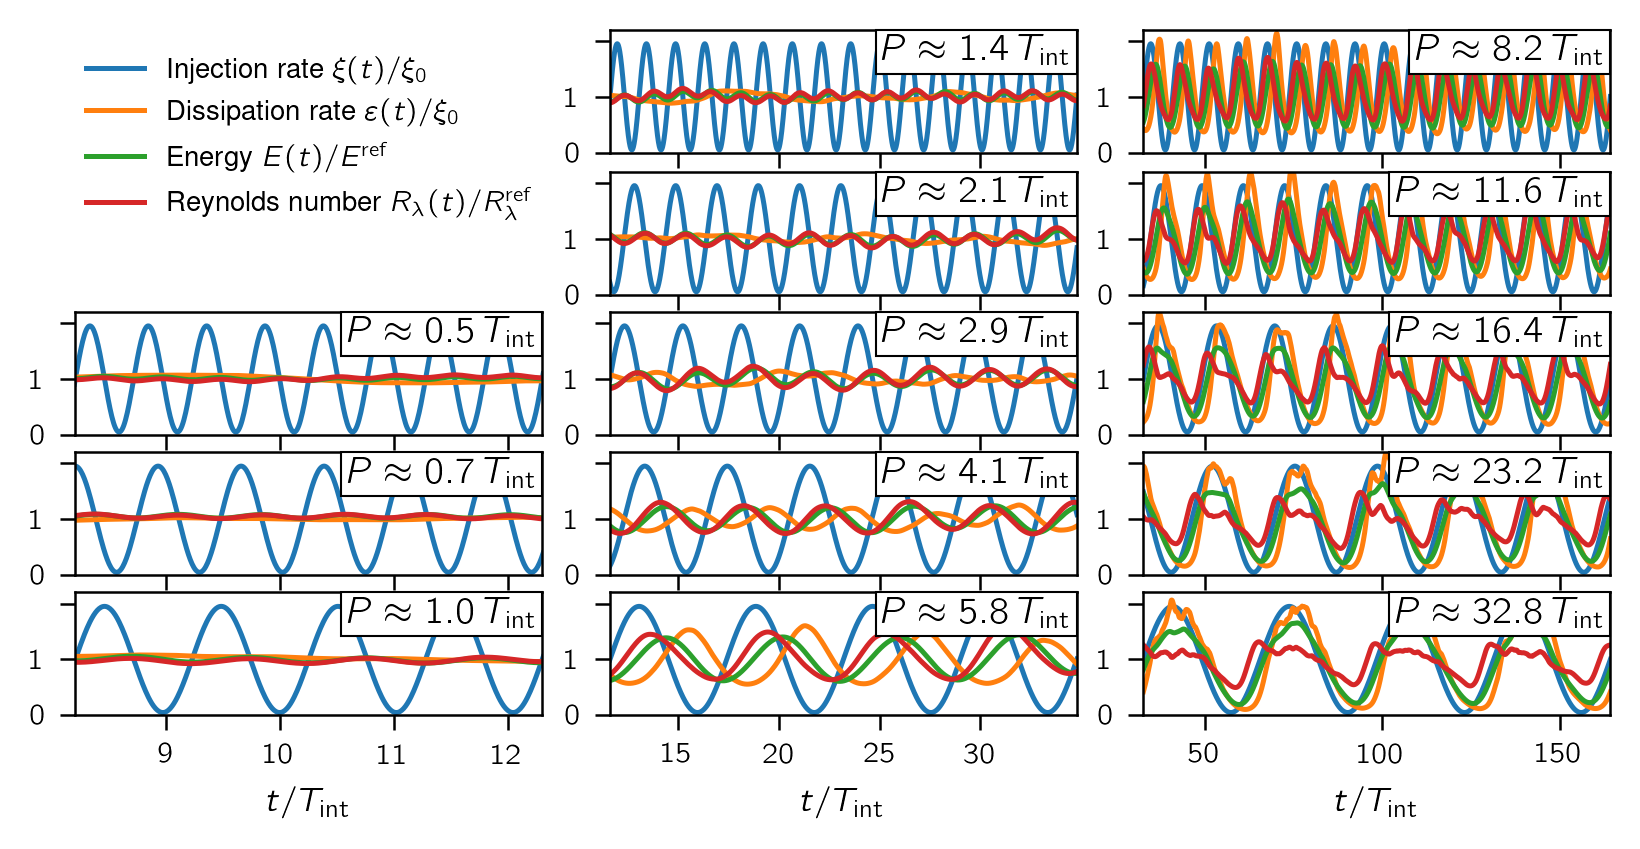

In [5]:
# set up figure
fig = plt.figure(figsize=(textwidth, 0.5*textwidth))
fig.get_layout_engine().set(w_pad=0.01, h_pad=0., hspace=0.01, wspace=0.04)
fig.get_layout_engine().set(rect=(0.0025,0.005,0.995,0.99))
colno = 3
rowno = int(np.ceil((1+len(varsim_list))/colno))
gs = fig.add_gridspec(rowno, colno)
empty_subplots = np.maximum(1, (rowno*colno) - len(varsim_list))
ax = None

# go through oscillating simulations
for vkey, varsim in enumerate(varsim_list):
    # share x-axis in each column
    ypos = (empty_subplots+vkey)%rowno
    prev_ax = ax
    ax = fig.add_subplot(gs[ypos, (empty_subplots+vkey)//rowno],
                         sharex = prev_ax if ypos > 0 else None)
    if ypos < rowno-1:
        plt.setp(ax.get_xticklabels(), visible=False)

    # plot data
    t = varsim.statistics['t']
    plt.plot(t/ref.Tint, varsim.get_injection_rate(t)/ref.injrate,
            label=r'Injection rate $\xi(t)/\xi_0$')
    plt.plot(t/ref.Tint, varsim.statistics['diss(t)']/ref.injrate,
            label=r'Dissipation rate $\varepsilon(t)/\xi_0$')
    plt.plot(t/ref.Tint, varsim.statistics['energy(t)']/ref.energy,
            label=r'Energy $E(t)/E^\mathrm{ref}$')
    plt.plot(t/ref.Tint, varsim.statistics['Rlambda(t)']/ref.Rlambda,
            label=r'Reynolds number $R_{\lambda}(t)/R_{\lambda}^{\mathrm{ref}}$', color='tab:red')

    # compute the widest range of full periods after the transient
    t0, t1 = varsim.trange_fullperiods(transient)

    # range and labels
    if (empty_subplots+vkey+1)%rowno == 0 or vkey == len(varsim_list)-1:
        plt.xlim(t[t0]/ref.Tint, (t[t0] + 4*varsim.get_period())/ref.Tint)
        plt.xlabel(r'$t/T_\mathrm{int}$')
    plt.ylim(0., 2.2)
    plt.yticks([0, 1, 2], ['$0$', '$1$', ''])

    # add subplot titles
    at = AnchoredText(
        r'$P \approx {}\,T_\mathrm{{int}}$'.format(np.round(varsim.get_period()/ref.Tint, 1)),
        frameon=True, loc='upper right', borderpad=0., pad=0.15)
    at.patch.set(lw=0.5, edgecolor='black')
    plt.gca().add_artist(at)

# put legend into empty subplots
axlegend = fig.add_subplot(gs[:empty_subplots, 0])
handles, labels = ax.get_legend_handles_labels()
axlegend.legend(handles, labels, loc='upper center',
                frameon=False)
plt.axis('off');